In [17]:
from pathlib import Path

notebook_path = Path().cwd().parent.parent.parent.parent
import sys

sys.path.insert(0, str(notebook_path))

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from explore.gcp.storage import gcp
from explore.src.preprocess.clean_stats import Cleaning
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.utilities.eda_funcs import describe_data

import warnings

warnings.filterwarnings("ignore")

In [18]:
pd.set_option("display.max_columns", None)

In [19]:
df = gcp.read_df_from_bucket(bucket_name="processed_fbref_db", blob_name="processed_shooting.csv")

[03/21/24 18:53:20] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=365527;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=62225;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

[03/21/24 18:53:21] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=840900;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=319750;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [20]:
df.head()

,rk,player,nation,pos,squad,comp,age,born,90s,goals,shots,shots_on_target,shots_on_target_pct,shots_per_90,shots_on_target_per_90,goals_per_shot,goals_per_shot_on_target,avg_shot_distance,free_kick_shots,penalty_kicks,penalty_kicks_attempted,xg,non_penalty_xg,non_penalty_xg_per_shot,goals_minus_xg,non_penalty_goals_minus_xg,season,general_pos,age_range,country,continent,player_id
0,1,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,26.0,1990.0,24.3,5,33.0,11,33.3,1.36,0.45,0.15,0.45,23.4,4.0,0,0,3.1,3.1,0.09,1.9,1.9,2017-2018,Defender,25-29,Netherlands,Europe,1
1,2,Rolando Aarons,ENG,"MF,FW",Newcastle Utd,Premier League,21.0,1995.0,1.5,0,2.0,0,0.0,1.29,0.00,0.00,NaN,19.9,0.0,0,0,0.1,0.1,0.03,-0.1,-0.1,2017-2018,Midfielder,20-24,England,Europe,2
2,3,Rolando Aarons,ENG,"MF,FW",Hellas Verona,Serie A,21.0,1995.0,5.7,0,3.0,0,0.0,0.52,0.00,0.00,NaN,17.4,0.0,0,0,0.2,0.2,0.05,-0.2,-0.2,2017-2018,Midfielder,20-24,England,Europe,2
3,4,Ignazio Abate,ITA,DF,Milan,Serie A,30.0,1986.0,11.7,1,4.0,2,50.0,0.34,0.17,0.25,0.50,17.1,0.0,0,0,0.2,0.2,0.04,0.8,0.8,2017-2018,Defender,30-34,Italy,Europe,3
4,5,Aymen Abdennour,TUN,DF,Marseille,Ligue 1,27.0,1989.0,5.5,0,2.0,1,50.0,0.36,0.18,0.00,0.00,11.5,0.0,0,0,0.1,0.1,0.06,-0.1,-0.1,2017-2018,Defender,25-29,Tunisia,Africa,4


In [21]:
describe_data(df)

,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
rk,int64,0,0.00,2920,1.0,2920.00,1366.00,1371.01,796.36,0,0.00
age,float64,3,0.02,29,14.0,42.00,25.00,25.34,4.53,19,0.10
born,float64,3,0.02,32,1977.0,2008.00,1995.00,1994.35,4.92,38,0.20
90s,float64,0,0.00,381,0.0,38.00,11.80,13.44,10.64,0,0.00
goals,int64,0,0.00,38,0.0,41.00,0.00,1.65,3.17,1635,8.55
shots,float64,3,0.02,151,0.0,195.00,8.00,15.13,19.67,1267,6.63
shots_on_target,int64,0,0.00,71,0.0,91.00,2.00,5.03,7.63,1356,7.09
shots_on_target_pct,float64,3464,18.12,445,0.0,100.00,30.00,29.94,20.80,521,2.72
shots_per_90,float64,3,0.02,573,0.0,180.00,0.82,1.24,2.07,500,2.61
shots_on_target_per_90,float64,0,0.00,298,0.0,30.00,0.19,0.39,0.76,702,3.67


## Striker Analysis

In [22]:
positions = ["Forward"]

# filter by position and minimum 20 90s
dff = df.loc[(df["general_pos"].isin(positions)) & (df["90s"] >= 20)]

In [23]:
describe_data(dff)

,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
rk,int64,0,0.0,865,8.00,2917.00,1449.00,1433.76,787.91,0,0.00
age,float64,0,0.0,23,17.00,39.00,26.00,25.98,3.91,1,0.10
born,float64,0,0.0,24,1981.00,2004.00,1993.00,1993.09,4.19,18,1.82
90s,float64,0,0.0,167,20.00,38.00,26.30,26.73,4.45,0,0.00
goals,int64,0,0.0,38,0.00,41.00,9.00,10.36,6.16,36,3.63
shots,float64,0,0.0,129,21.00,195.00,63.00,67.78,26.25,31,3.13
shots_on_target,int64,0,0.0,66,5.00,91.00,24.00,26.20,11.65,30,3.03
shots_on_target_pct,float64,0,0.0,279,14.30,64.30,38.50,38.48,7.39,7,0.71
shots_per_90,float64,0,0.0,310,0.84,6.85,2.41,2.52,0.80,26,2.62
shots_on_target_per_90,float64,0,0.0,169,0.21,2.84,0.93,0.97,0.37,21,2.12


## Player Insights

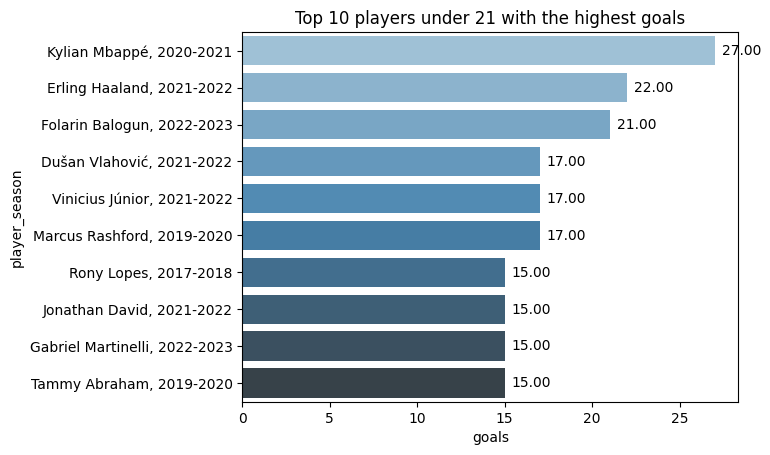

In [24]:
def create_bar_plot(df: pd.DataFrame, stat: str, age: str) -> None:
    filtered = (
        df.loc[df["age"] == age]
        .sort_values(by=stat, ascending=False)
        .head(10)
    )
    filtered["player_season"] = filtered["player"] + ", " + filtered["season"]
    plots = sns.barplot(data=filtered, x=stat, y="player_season", palette="Blues_d")
    for bar in plots.patches:
        plots.annotate(
            format(bar.get_width(), ".2f"),
            (bar.get_width(), bar.get_y() + bar.get_height() / 2),
            ha="left",
            va="center",
            size=10,
            xytext=(5, 0),
            textcoords="offset points",
        )
    plt.title(f"Top 10 players under {age} with the highest {stat}")
    plt.show()
    
create_bar_plot(dff, "goals", 21)

## Country Insights

In [25]:
def goal_stats(df: pd.DataFrame, groupby: str, sort_by: str):
    return (
        df.groupby(groupby)[
            [
                "goals",
                "xg",
                "non_penalty_xg",
                "non_penalty_xg_per_shot",
                "goals_minus_xg",
                "non_penalty_goals_minus_xg",
            ]
        ]
        .mean()
        .reset_index()
        .sort_values(sort_by, ascending=False)
    )
    
goal_stats(dff, "age", 'non_penalty_goals_minus_xg')

,age,goals,xg,non_penalty_xg,non_penalty_xg_per_shot,goals_minus_xg,non_penalty_goals_minus_xg
22,39.0,10.000000,6.400000,5.600000,0.120000,3.600000,4.400000
14,31.0,12.704545,11.554545,9.486364,0.133182,1.150000,1.059091
16,33.0,14.833333,14.188889,11.783333,0.145000,0.644444,0.938889
13,30.0,12.192982,11.549123,9.668421,0.130702,0.643860,0.735088
8,25.0,9.478261,8.771739,7.665217,0.125217,0.706522,0.693478
7,24.0,9.953271,9.327103,8.446729,0.121682,0.616822,0.665421
2,19.0,9.470588,8.847059,8.376471,0.125882,0.623529,0.564706
12,29.0,10.637681,10.060870,8.427536,0.127391,0.576812,0.500000
11,28.0,10.866667,10.242667,8.782667,0.135067,0.624000,0.484000
4,21.0,9.553846,9.050769,8.116923,0.123538,0.503077,0.467692


## Relationship between Goals and Related Stats

In [26]:
dff_plots = StatisticPlots(dff)

Plot goals vs relevant goal scoring variables

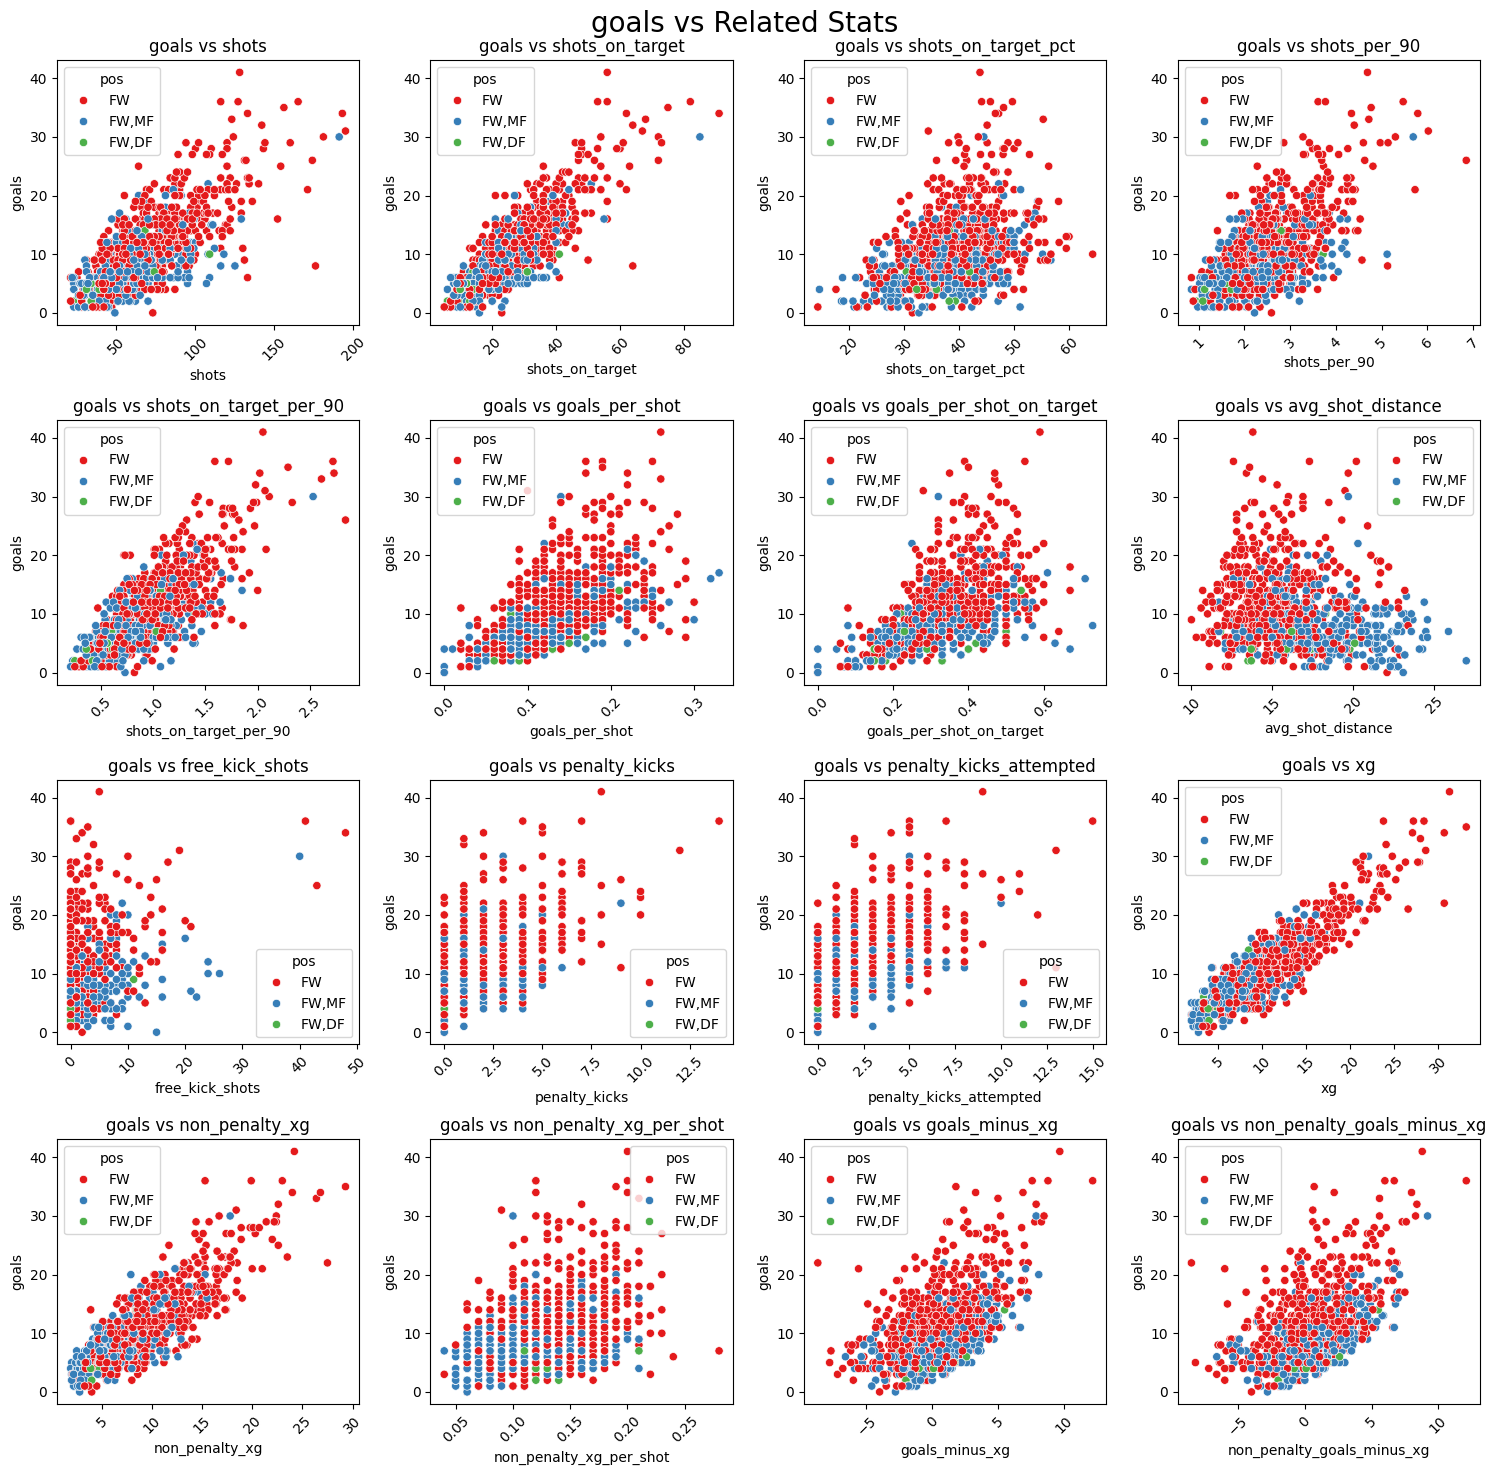

In [27]:
columns = dff.columns[10:-6].tolist()
dff_plots.relationships(y="goals", X=columns, hue="pos", palette="Set1")

## Correlation Analysis


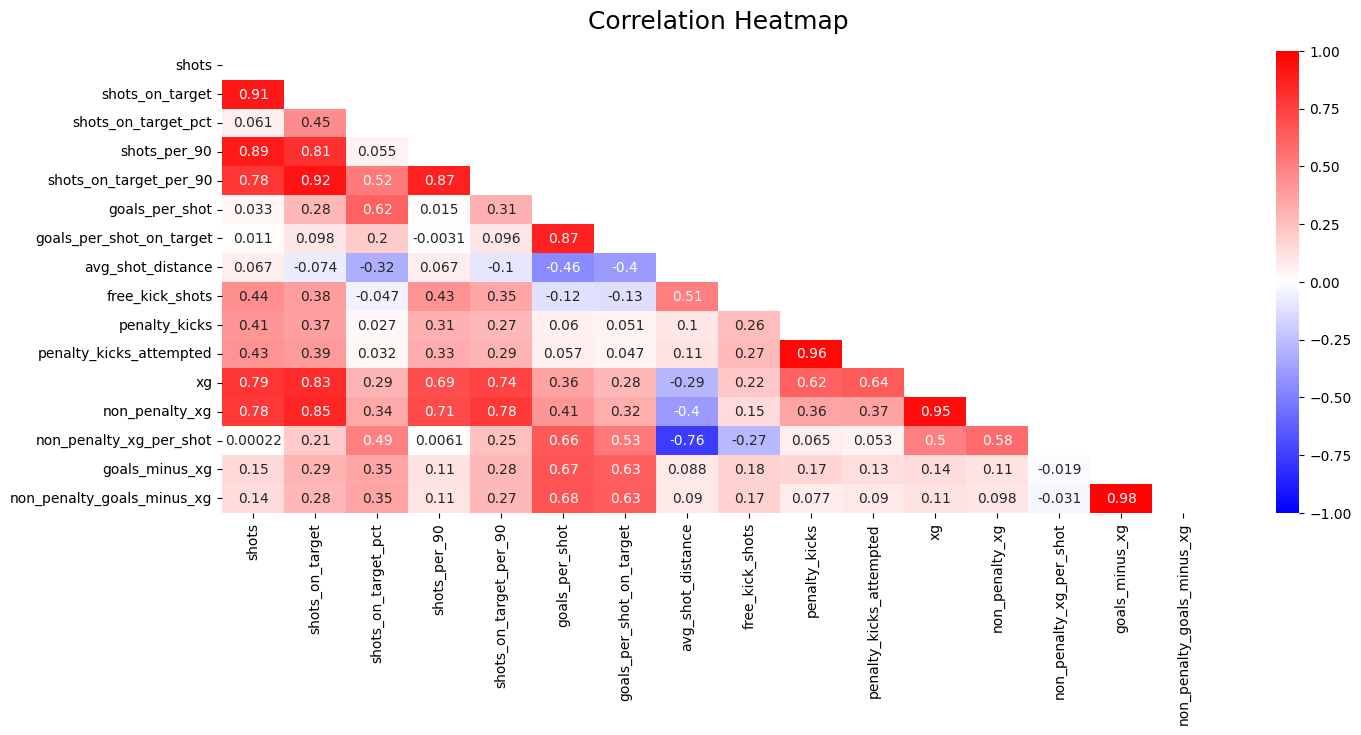

In [29]:
dff_plots.correlation_matrix(columns)

Correlation between dependent and independent variables


In [31]:
columns

['shots',
 'shots_on_target',
 'shots_on_target_pct',
 'shots_per_90',
 'shots_on_target_per_90',
 'goals_per_shot',
 'goals_per_shot_on_target',
 'avg_shot_distance',
 'free_kick_shots',
 'penalty_kicks',
 'penalty_kicks_attempted',
 'xg',
 'non_penalty_xg',
 'non_penalty_xg_per_shot',
 'goals_minus_xg',
 'non_penalty_goals_minus_xg']

In [32]:
dff

,rk,player,nation,pos,squad,comp,age,born,90s,goals,shots,shots_on_target,shots_on_target_pct,shots_per_90,shots_on_target_per_90,goals_per_shot,goals_per_shot_on_target,avg_shot_distance,free_kick_shots,penalty_kicks,penalty_kicks_attempted,xg,non_penalty_xg,non_penalty_xg_per_shot,goals_minus_xg,non_penalty_goals_minus_xg,season,general_pos,age_range,country,continent,player_id
21,22,Aritz Aduriz,ESP,FW,Athletic Club,La Liga,36.0,1981.0,23.9,9,56.0,23,41.1,2.34,0.96,0.11,0.26,13.5,0.0,3,5,11.1,7.6,0.13,-2.1,-1.6,2017-2018,Forward,35-39,Spain,Europe,21
26,27,Sergio Agüero,ARG,FW,Manchester City,Premier League,29.0,1988.0,21.8,21,90.0,38,42.2,4.13,1.74,0.19,0.45,13.9,1.0,4,4,16.2,13.1,0.15,4.8,3.9,2017-2018,Forward,25-29,Argentina,South America,26
43,44,Luis Alberto,ESP,"FW,MF",Lazio,Serie A,24.0,1992.0,29.7,11,79.0,23,29.1,2.66,0.78,0.13,0.43,22.3,9.0,1,2,7.2,5.7,0.07,3.8,4.3,2017-2018,Forward,20-24,Spain,Europe,43
98,99,Mirco Antenucci,ITA,FW,SPAL,Serie A,32.0,1984.0,28.6,11,60.0,21,35.0,2.10,0.74,0.10,0.29,19.2,0.0,5,5,8.1,4.2,0.07,2.9,1.8,2017-2018,Forward,30-34,Italy,Europe,97
110,111,Luiz Araújo,BRA,"FW,MF",Lille,Ligue 1,21.0,1996.0,22.4,5,51.0,16,31.4,2.27,0.71,0.10,0.31,20.8,1.0,0,0,5.2,5.2,0.10,-0.2,-0.2,2017-2018,Forward,20-24,Brazil,South America,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16620,2800,Nico Williams,ESP,FW,Athletic Club,La Liga,20.0,2002.0,29.5,6,61.0,20,32.8,2.07,0.68,0.10,0.30,17.7,1.0,0,0,4.9,4.9,0.08,1.1,1.1,2022-2023,Forward,20-24,Spain,Europe,4627
16621,2801,Willian,BRA,FW,Fulham,Premier League,33.0,1988.0,23.6,5,41.0,17,41.5,1.74,0.72,0.12,0.29,18.8,3.0,0,0,3.4,3.4,0.08,1.6,1.6,2022-2023,Forward,30-34,Brazil,South America,2500
16623,2803,Callum Wilson,ENG,FW,Newcastle Utd,Premier League,30.0,1992.0,20.9,18,70.0,31,44.3,3.36,1.49,0.21,0.48,12.4,0.0,3,3,17.5,15.1,0.22,0.5,-0.1,2022-2023,Forward,30-34,England,Europe,2503
16656,2836,Mattia Zaccagni,ITA,FW,Lazio,Serie A,27.0,1995.0,30.8,10,56.0,23,41.1,1.82,0.75,0.16,0.39,16.7,1.0,1,1,6.7,5.9,0.11,3.3,3.1,2022-2023,Forward,25-29,Italy,Europe,2524


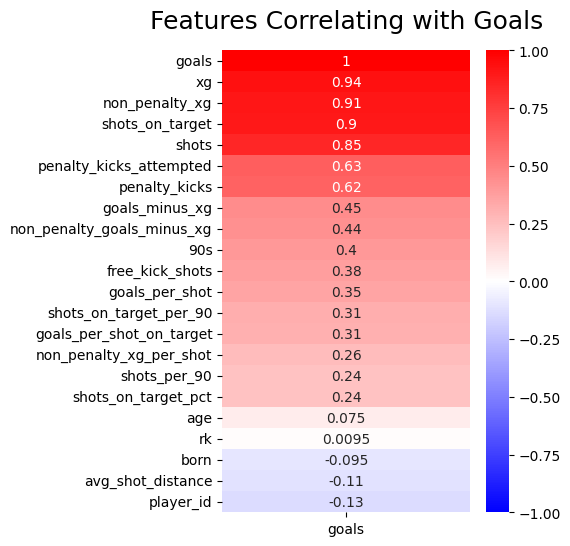

In [34]:
def dependent_correlations(df: pd.DataFrame, dependent_var: str) -> None:

    plt.figure(figsize=(4, 6))
    heatmap = sns.heatmap(
        df.corr(numeric_only=True)[[dependent_var]].sort_values(by=dependent_var, ascending=False),
        vmin=-1,
        vmax=1,
        annot=True,
        cmap="bwr",
    )
    heatmap.set_title(
        f"Features Correlating with {dependent_var.capitalize()}", fontdict={"fontsize": 18}, pad=16
    )
    plt.show()
    
dependent_correlations(df, "goals")
    